# Введение

В данном ноутбуке собраны все материалы из главы 1.0 Основные элементы и операции над ними из курса "Геопространственный анализ данных". Рассматривается работа с библиотекой `shapely`

# Основные элементы

Строительные элементы векторных данных:

Точка или  `Point`: объект представляет собой одну точку в географическом пространстве, а местоположение точки в пространстве определяется координатами. Точки могут быть как двумерными (с координатами x, y), так и трехмерными (с координатами x, y и z, где z - высота).

Линия или `LineStrin`g: объект представляет собой последовательность точек, соединенных вместе, чтобы сформировать линию. Следовательно, линия состоит из списка кортежей координат или точек (как минимум из двух).

Полигон или `Polygon`: объект представляет собой заполненную область, состоящую из списка кортежей координат или точек (как минимум из трех), образующих периметр или внешнее кольцо, а также возможного списка отверстий.

Также есть возможность создавать коллекции геометрических объектов (т.е. несколько точек, линий или полигонов), представленных как `MultiPoint`, `MultiLineString` и `MultiPolygon`. В дополнение к ним, вы иногда можете услышать о других геометрических объектах, таких как Кривая или Curve, Поверхность или Surface, Геометрическая коллекция или `GeometryCollection`, но в основном они реализуются с помощью `Point`, `LineString` и `Polygon`.

## Точка

Создать геометрический объект Точку проще всего:

In [ ]:
# Импортируем класс shapely.geometry.Point
from shapely.geometry import Point

# Создаем объекты Point:
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

Можно сразу вывести одну из них

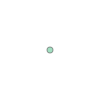

In [ ]:
point1

Или альтернативный вариант вывести точку в формате WKT с помощью команды `print()`

In [ ]:
print(point1)

POINT (2.2 4.2)


Рассмотрим несколько свойств и методов:

In [ ]:
# Тип геометрии:
point1.geom_type

'Point'

In [ ]:
# Получить кортеж(ы) координат
list(point1.coords)

[(2.2, 4.2)]

In [ ]:
# Отдельное обращение к координатам x и y
x = point1.x
y = point1.y
print(x, y)

2.2 4.2


In [ ]:
# Рассчитаем расстояние между point1 и point2
dist = point1.distance(point2)

# Вывод расстояния
print(f"Расстояние между точками = {dist:.2f} единиц")

Расстояние между точками = 29.72 единиц


## Линия

Создание объектов `LineString` аналогично созданию `Points`. Вместо одного кортежа координат мы передаем список кортежей координат, или список точек, которые составляют линию:

In [ ]:
# Импортируем класс LineString
from shapely.geometry import LineString

# Создаем объект LineString из объектов Point
line = LineString([point1, point2, point3])

# Создаем объект LineString из списка координат:
# (с теми же значениями координат, что и точки, поэтому результаты должны быть идентичными)
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# Проверяем, действительно ли линии идентичны:
line == line2

True

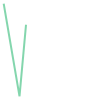

In [ ]:
line

Рассмотрим несколько свойств и методов:

In [ ]:
# Получаем кортеж(ы) координат
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

In [ ]:
# Получаем x и y координаты
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


In [ ]:
# Получаем длину линии
line_length = line.length
print(f"Длина линии: {line_length:.1f} единиц")

# Получаем центральную точку линии
print(f"Центральная точка линии: {line.centroid:.2f}")

Длина линии: 52.5 единиц
Центральная точка линии: POINT (6.23 -11.89)


## Замкнутная линия

В библиотеке `shapely` создан отдельный класс `LinearRing`, что на русский язык можно перевести, как закольцованная или замкнутая линия.

`LinearRing` создается аналогично `LineString`s путем передачи последовательности точек. Эта последовательность может быть задана явно путем передачи одинаковых значений в первый и последний индексы. В противном случае последовательность будет создана неявно путем автоматического копирования первого кортежа координат в последний индекс. Как и в случае с `LineString`, повторные точки в упорядоченной последовательности допускаются, но могут привести к снижению производительности, поэтому их следует избегать.  `LinearRing` не может пересекать себя и не может касаться себя в одной или более точках.

In [ ]:
# Импортируем класс LineString
from shapely.geometry import LinearRing

# Создаем объект LineString явно из объектов Point
linearring1 = LinearRing([point1, point2, point3, point1])

# Создаем объект LineString неявно из объектов Point
linearring2 = LinearRing([point1, point2, point3])

# Проверяем, действительно ли линии идентичны:
linearring1 == linearring2

True

Свойства и методы рассматривать не будем, они идентичны `LineString`.

## Полигон

Создание геометрии `Polygon` происходит по той же логике, что и создание геометрий: точки или линии. Однако, правила создания полигона чуть сложнее: он должен состоять ровно из одной замкнутой линии, образующей его внешнюю сторону = периметр, и любого количества дополнительных замкнутых линий, образующих отверстия, которые вырезаются из внешней оболочки.

Следовательно, функция `shapely.geometry.Polygon` принимает два параметра: первый, `shell` (или оболочка, корпус), представляет собой список кортежей координат, список точек или `LinearRing`, и будет формировать внешний периметр создаваемого полигона. Второй, необязательный, параметр `holes` (или отверстия), представляет собой список отверстий, которые нужно вырезать в оболочке/корпусе (элементы в списке могут быть тех же типов данных, что и оболочка/корпус).

Теперь давайте создадим простой полигон без отверстий тремя разными способами:

In [ ]:
from shapely.geometry import Polygon, LinearRing

# Создаем Polygon из координат
polygon1 = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# Создаем Polygon из точек
polygon2 = Polygon([point1, point2, point3])

# Создаем Polygon из LinearRing
polygon3 = Polygon(linearring1)

# Проверяем, действительно ли полигоны одинаковы:
polygon1 == polygon2 == polygon3

True

Посмотрим на наш полигон

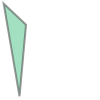

In [ ]:
polygon1

Теперь давай попробуем создать полигон с отверстием:

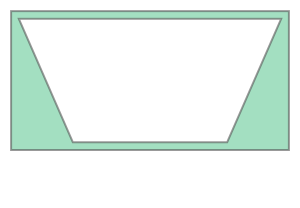

In [ ]:
# Задаем внешний периметр
outer = LinearRing([(-180, 90), (-180, -90), (180, -90), (180, 90)])

# Задаем периметр отверстия
hole = LinearRing([(-170, 80), (-100, -80), (100, -80), (170, 80)])

# Создаем полигон с отверстием
polygon_with_hole = Polygon(outer, [hole])

# Посмотрим на него
polygon_with_hole

Рассмотрим несколько свойств и методов:

In [ ]:
print(f"Центр полигона: {polygon_with_hole.centroid}")
print(f"Площадь полигона: {polygon_with_hole.area}")
print(f"Ограничительная рамка полигона: {polygon_with_hole.bounds}")
print(f"Внешнее кольцо полигона: {polygon_with_hole.exterior}")
print(f"Периметр полигона: {polygon_with_hole.exterior.length}")

Центр полигона: POINT (0 -13.827160493827162)
Площадь полигона: 21600.0
Ограничительная рамка полигона: (-180.0, -90.0, 180.0, 90.0)
Внешнее кольцо полигона: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Периметр полигона: 1080.0


## Коллекции геометрий

Иногда бывает полезно хранить несколько геометрий (например, несколько точек или несколько полигонов) в одном объекте. С семантической точки зрения, хранить несколько полигонов в отдельных строках не имеет смысла. В этом случае приходят на помощь `MultiPoint, MultiLineString, MultiPoligon, GeometryCollections`.

In [ ]:
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon

# Создаем объект MultiPoint из наших точек points 1,2 и 3
multipoint = MultiPoint([point1, point2, point3])

# Аналогично можно создать MultiLineString из двух линий
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multiline = MultiLineString([line1, line2])

`MultiPolygon` строятся аналогичным образом.

`GeometryCollections` используется для объединения разных типов геометрий:

In [ ]:
from shapely.geometry import GeometryCollection

# Создаем объект GeometryCollection из наших multipoint и  multiline
collection = GeometryCollection([multipoint, multiline])
print(collection)

GEOMETRYCOLLECTION (MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456), MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456)))


# Пространственные отношения

Пространственное отношение (или взаимоотношения элементов) определяет, как некоторый объект расположен в пространстве по отношению к другому объекту.

Обычно пространственные отношения разделяют на следующие типы: топологические отношения, отношения направления и отношения расстояний.

In [ ]:
# Точка находится на линии ?
Point(0.5, 0.5).within(LineString([(0, 0), (1, 1)])) # True

True

In [ ]:
# Линия 1 касается Линии 2?
LineString([(0, 0), (1, 1)]).touches(LineString([(1, 1), (2, 2)])) # True

True

In [ ]:
# Линия 1 пересекает Линию 2?
LineString([(0, 0), (1, 1)]).crosses(LineString([(0, 1), (1, 0)])) # True

True

In [ ]:
# Круг 1 перекрывает Круг 2?
Point(1, 1).buffer(1.5).overlaps(Point(2, 1).buffer(1.5)) # True

True

In [ ]:
# Линия 1 содержит Точку 1 ?
LineString([(0, 0), (1, 1)]).contains(Point(0.5, 0.5))  # True

True

In [ ]:
# Линия 1 пересекает Точку 1?
LineString([(0, 0), (1, 1)]).intersects(Point(0.5, 0.5))  # True

True

# Другие полезные свойства и методы

В заключении разберем еще пару полезных свойств и методов геометрий, который могут пригодиться в работе:

In [ ]:
print(f"Полигон правильный?: {polygon_with_hole.is_valid}")  # True

Полигон правильный?: True


Буфер

In [ ]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
# Положительное расстояние "надувает" объект, создавая буферный полигон вокруг объекта
dilated = line.buffer(0.5)
# Отрицательное расстояние "сдувает" объект, уменьшая полигон
eroded = dilated.buffer(-0.3)
# Также можно строить буферный полигон слева или справа от объекта
left_hand_side = line.buffer(0.5, single_sided=True)
right_hand_side = line.buffer(-0.3, single_sided=True)

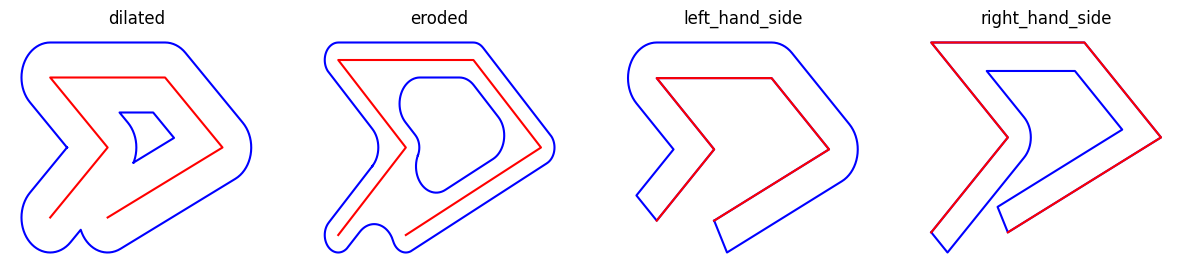

In [ ]:
# Нарисуем полученные полигоны
import matplotlib.pyplot as plt

list_of_elements = ['dilated', 'eroded', 'left_hand_side', 'right_hand_side']

fig, axs = plt.subplots(1, len(list_of_elements), figsize=(15,3))

for elem, index in zip(list_of_elements, list(range(len(list_of_elements)))):
    # Рисуем периметр полигона
    axs[index].plot(*eval(elem).exterior.xy, color='blue')
    axs[index].set_title(str(f'{elem}'))
    # Рисуем отверстия, если они есть внутри полигона
    if eval(elem).interiors:
    # Получаем координаты всех отверстий
        for inner in eval(elem).interiors:
            xi, yi = zip(*inner.coords[:])
            axs[index].plot(xi, yi, color='blue')
    # Дополнительно нарисуем оригинальную линию
    axs[index].plot(*line.xy, color='red')
    axs[index].axis("off")

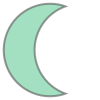

In [ ]:
# Из точек делаем круги через буфер
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
# Находим разницу геометрий a & b
c = a.difference(b)
c

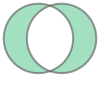

In [ ]:
# Находим симметричную разницу геометрий a & b
d = a.symmetric_difference(b)
d

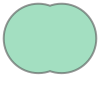

In [ ]:
# Объединяем две фигуры a & b
e = a.union(b)
e

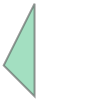

In [ ]:
# Строим полигон содержащий все наши точки
MultiPoint([(0, 0), (1, 1), (1, -1), (1, 2)]).convex_hull

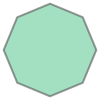

In [ ]:
# Упрощаем круг до 8 угольника
p = Point(0.0, 0.0)
x = p.buffer(1.0)
s = x.simplify(0.2, preserve_topology=False)
s

На этом закончим наше знакомство с основными элементами векторных геометрических объектов и библиотекой shapely.